In [3]:
pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 495.5 kB/s eta 0:00:07
     - -------------------------------------- 0.1/3.0 MB 751.6 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/3.0 MB 952.6 kB/s eta 0:00:03
     --- ------------------------------------ 0.2/3.0 MB 1.1 MB/s eta 0:00:03
     ---- ----------------------------------- 0.3/3.0 MB 1.3 MB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 1.4 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 1.3 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 1.3 MB/s eta 0:00:02
     -------- ------------------------------- 0.6/3.0 MB 1.5 MB/s eta 0:00:02
     --------- ------------------------------ 0.7/3.0 MB 1.5 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.5 MB/s eta 0:

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')


In [7]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [9]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [11]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-03-29,82597.585938,84567.335938,81634.140625,84352.070312,16969396135
2025-03-30,82334.523438,83505.000000,81573.250000,82596.984375,14763760943
2025-03-31,82548.914062,83870.125000,81293.890625,82336.062500,29004228247
2025-04-01,85169.171875,85487.367188,82429.359375,82551.921875,28175650319
2025-04-02,84550.109375,85200.843750,83989.039062,85169.468750,28644902912


In [13]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3851.0,2.134465e+04,2.460935e+04,1.781030e+02,1.587755e+03,9.648718e+03,3.463286e+04,1.061463e+05
High,BTC-USD,3851.0,2.179590e+04,2.511077e+04,2.117310e+02,1.613470e+03,9.798330e+03,3.535263e+04,1.091149e+05
Low,BTC-USD,3851.0,2.082553e+04,2.403846e+04,1.715100e+02,1.551130e+03,9.428303e+03,3.348493e+04,1.052917e+05
Open,BTC-USD,3851.0,2.132399e+04,2.459207e+04,1.768970e+02,1.568140e+03,9.632149e+03,3.456957e+04,1.061473e+05
Volume,BTC-USD,3851.0,1.918613e+10,2.078370e+10,5.914570e+06,7.062710e+08,1.532430e+10,3.034618e+10,3.509679e+11


In [15]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3851 entries, 2014-09-17 to 2025-04-02
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3851 non-null   float64
 1   (High, BTC-USD)    3851 non-null   float64
 2   (Low, BTC-USD)     3851 non-null   float64
 3   (Open, BTC-USD)    3851 non-null   float64
 4   (Volume, BTC-USD)  3851 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 180.5 KB


In [17]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [19]:
closing_price = stock_data[['Close']]

In [21]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-03-29,82597.585938
2025-03-30,82334.523438
2025-03-31,82548.914062


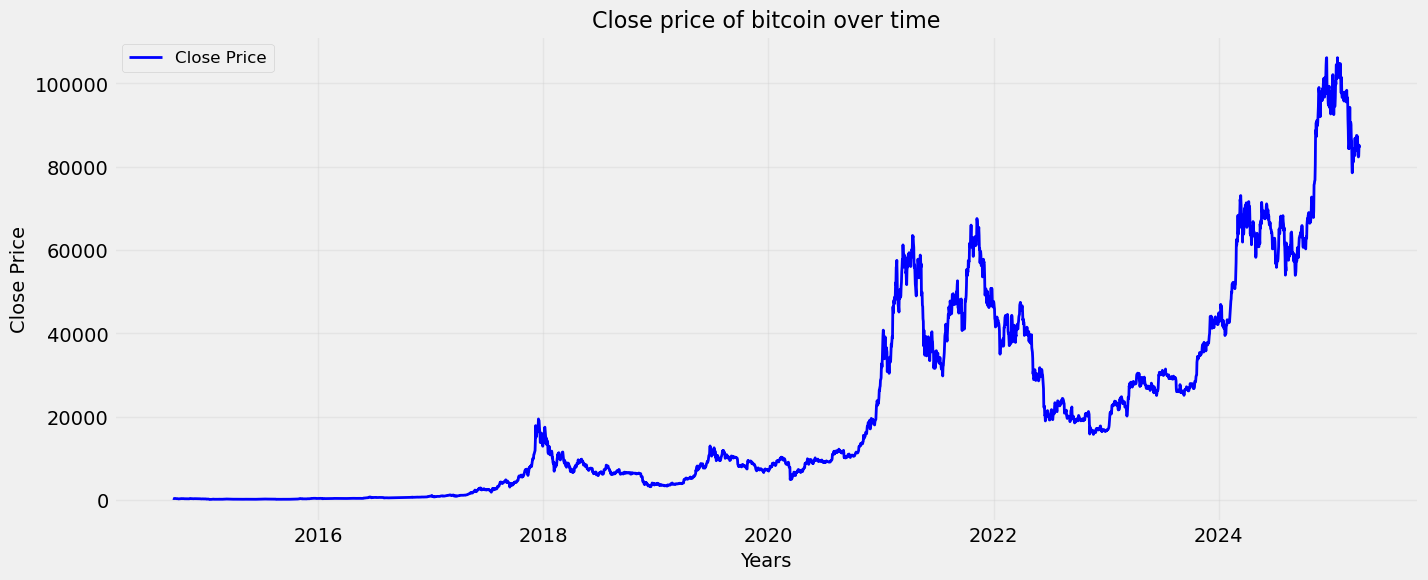

In [23]:
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [25]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [27]:
df1 = pd.DataFrame(temp_data)

In [29]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [31]:
for i in range(2014, 2025):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [33]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

C:\Users\shaan\AppData\Local\Temp\ipykernel_18112\194502310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
C:\Users\shaan\AppData\Local\Temp\ipykernel_18112\194502310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


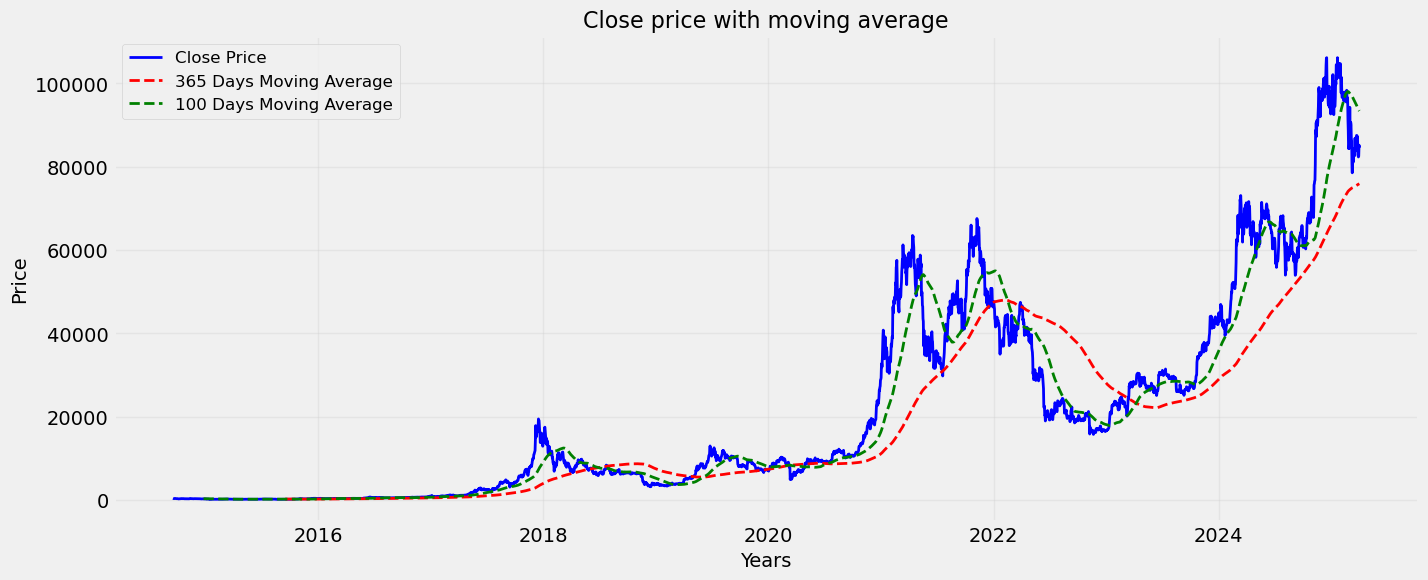

In [35]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [37]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [39]:
len(scaled_data)

3851

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Input

In [42]:
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [43]:
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [53]:
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),  # Define input explicitly
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.0021
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 2.8951e-04
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1.8545e-04
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1.6676e-04
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1.4116e-04
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 1.4628e-04
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1.3672e-04
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1.0361e-04
Epoch 9/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1.3644e-04
Epoch 10/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 9.4733e-05


In [59]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


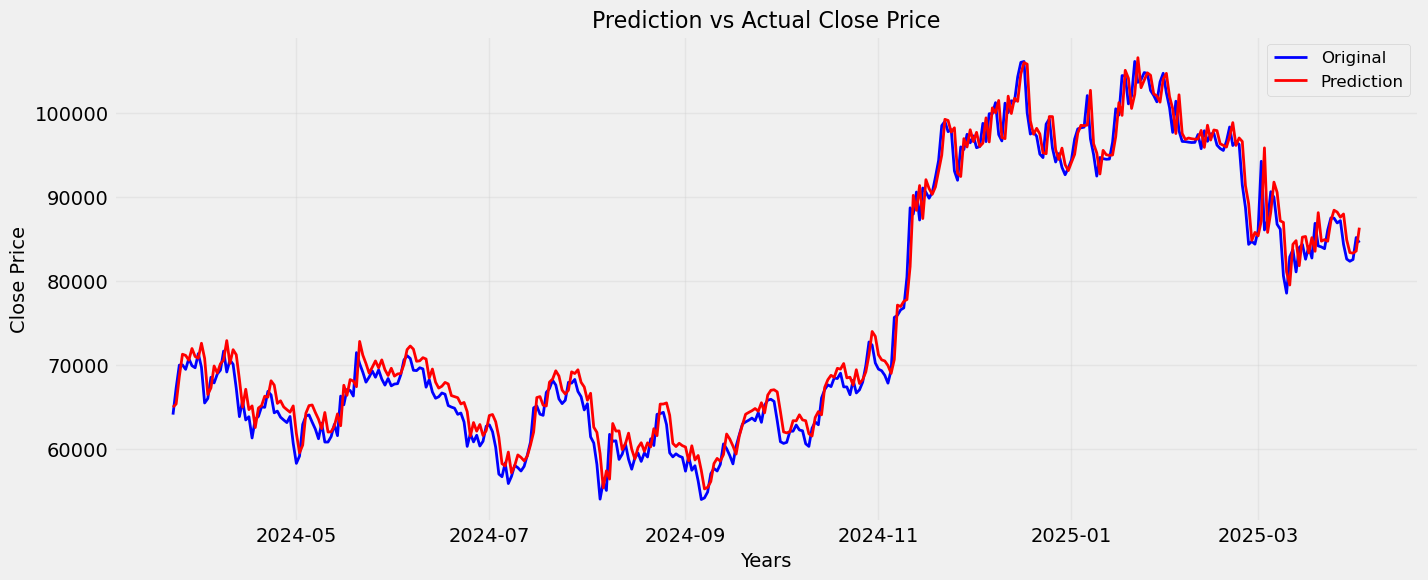

In [61]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [63]:
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [65]:
future_predictions

[array([[85349.84]], dtype=float32),
 array([[86276.586]], dtype=float32),
 array([[87186.336]], dtype=float32),
 array([[88052.8]], dtype=float32),
 array([[88875.336]], dtype=float32),
 array([[89656.33]], dtype=float32),
 array([[90397.64]], dtype=float32),
 array([[91100.766]], dtype=float32),
 array([[91767.09]], dtype=float32),
 array([[92397.93]], dtype=float32)]

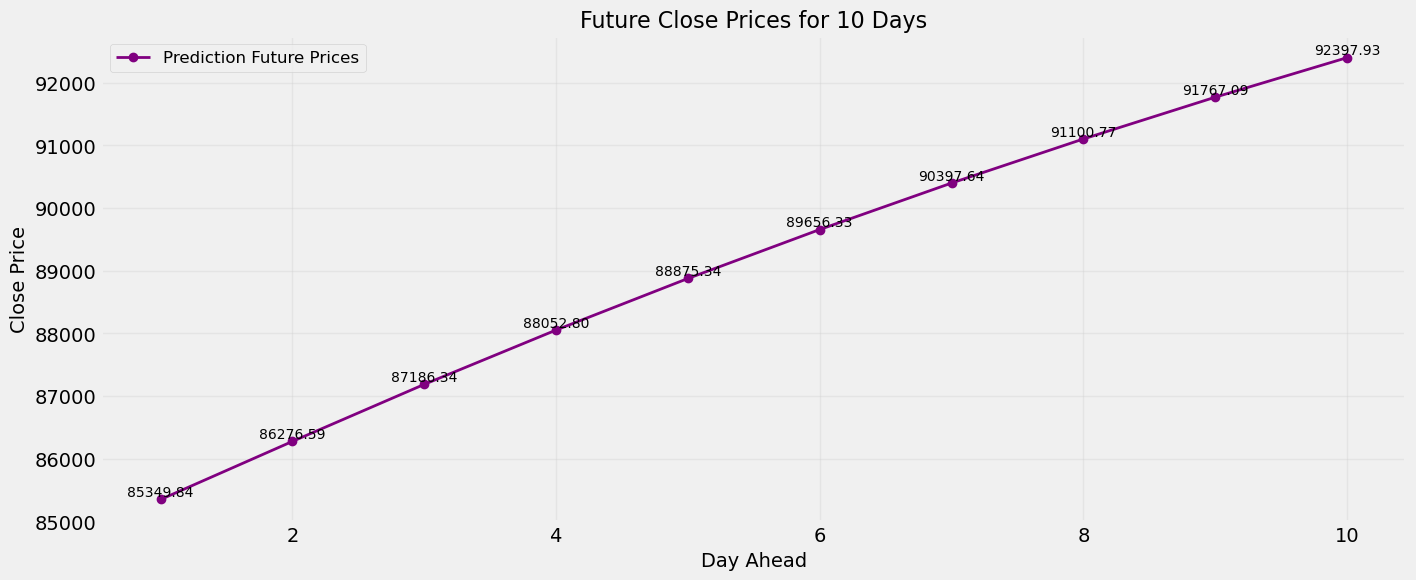

In [67]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [71]:
model.save("model.keras")